In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\sukha\Downloads\DATA_SCIENCE\DATASET\Cleaned_DATA.csv")



In [3]:
# --- 1. Drop Columns ---
df = df.drop(columns=['Country', 'Month'])


In [4]:

# --- 2. Define Features (X) and Target (y) ---
target_column = 'Reservoir_Water_Storage_BCM'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify numerical and categorical features
numerical_cols = ['Year', 'Full_Reservoir_Capacity_BCM', 'Reservoir_Water_Level_M']
categorical_cols = ['State', 'District', 'Reservoir Basin Name', 'Reservoir Name']


In [5]:

# --- 3. Handle Categorical Features (One-Hot Encoding) ---
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [6]:

# --- 4. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:

# --- 5. Feature Scaling (Crucial for KNN) ---
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the numerical columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform the numerical columns in the test set (do not fit on test data)
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(f"Data Preparation and Scaling Complete. X_train shape: {X_train.shape}")

Data Preparation and Scaling Complete. X_train shape: (42900, 584)


In [8]:
# --- 1. Initialize Model ---
# Initialize the K-Nearest Neighbors Regressor
# We set n_neighbors=5, a typical starting point.
knn_model = KNeighborsRegressor(
    n_neighbors=5, 
    n_jobs=-1 # Use all available cores
)

print("Starting K-Nearest Neighbors Regressor Model Training...")


Starting K-Nearest Neighbors Regressor Model Training...


In [9]:

# --- 2. Train Model ---
# Train the model using the scaled training data
knn_model.fit(X_train, y_train)

print("K-Nearest Neighbors Regressor Model training complete.")

K-Nearest Neighbors Regressor Model training complete.


In [10]:
# --- 1. Make Predictions ---
# Predict the reservoir water storage on the test set
y_pred = knn_model.predict(X_test)



In [11]:
# --- 2. Calculate Evaluation Metrics ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [12]:

# --- 3. Display Results ---
print("--- KNN Regressor Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")

--- KNN Regressor Model Evaluation ---
Mean Absolute Error (MAE): 0.0393
Mean Squared Error (MSE): 0.0299
Root Mean Squared Error (RMSE): 0.1729
R-squared (R^2): 0.9264


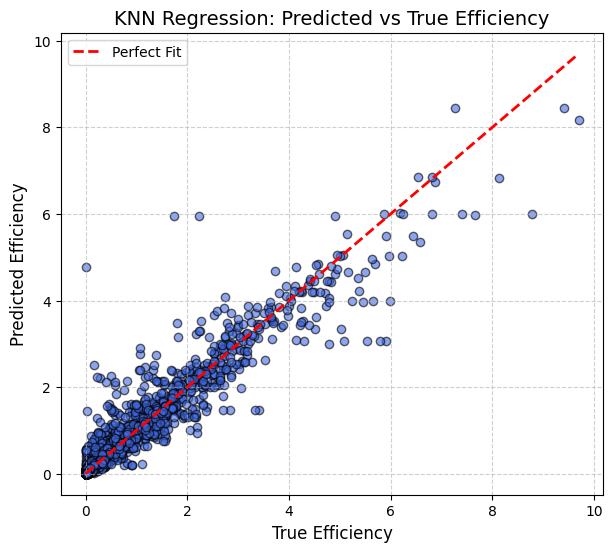

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these variables exist:
# y_test → actual efficiency values
# y_pred → predicted efficiency values from KNN model

plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.6, edgecolor='k')

# Add a perfect-fit line (y = x)
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Fit')

plt.title('KNN Regression: Predicted vs True Efficiency', fontsize=14)
plt.xlabel('True Efficiency', fontsize=12)
plt.ylabel('Predicted Efficiency', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
